In [58]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt

In [73]:
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((8*6,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.


In [70]:
images = glob.glob('../assets/checkerboard/*.jpg')

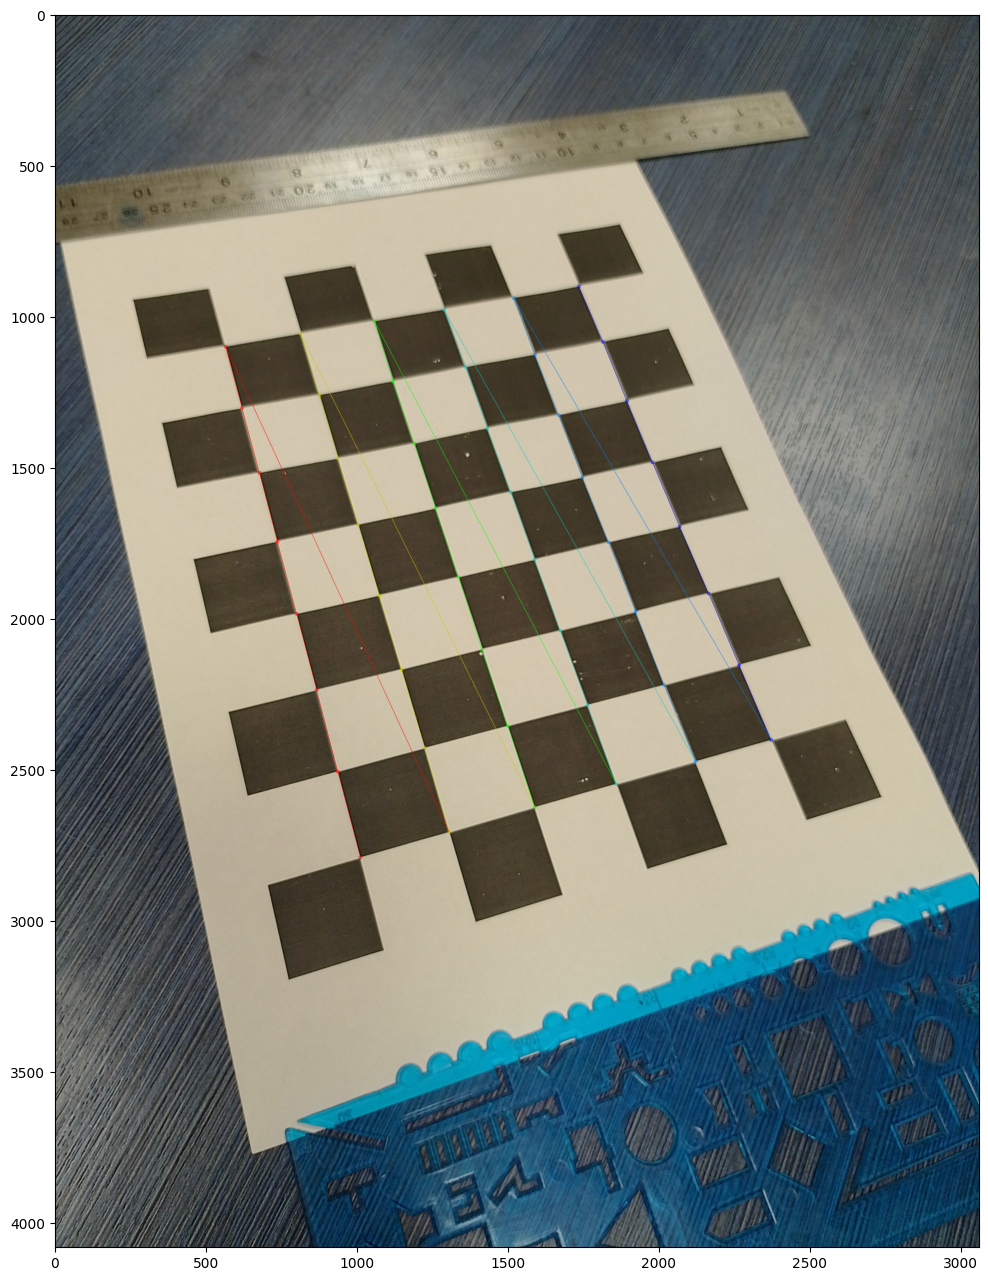

In [68]:

img = cv.imread(images[0])
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Find the chess board corners
ret, corners = cv.findChessboardCorners(gray, (8,6), cv.CALIB_CB_ADAPTIVE_THRESH + cv.CALIB_CB_NORMALIZE_IMAGE)
# If found, add object points, image points (after refining them)

if ret == True:
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)    
    cv.drawChessboardCorners(img, (8,6), corners2, ret)

plt.figure(figsize=(15,16))
plt.imshow(img)
plt.show()




In [74]:
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (8,6), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)


In [75]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

Забавный факт: фокусные расстояния в матрице внутренних параметров выражаются в пикселях! 

$F_x = f_x \times W / w$ <br /> 
$F_y = f_y \times H / h$

W:  размер сенсора, мм
w: размер изображения, пиксель
fx: фокусное расстояние, пиксель 


In [77]:
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

Camera matrix : 

[[3.07572420e+03 0.00000000e+00 1.48000478e+03]
 [0.00000000e+00 3.18098248e+03 2.38375400e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[ 0.01831889  0.29564376  0.00111278 -0.00447863 -0.83151001]]
rvecs : 

(array([[-0.39064585],
       [ 0.16401471],
       [ 1.26500238]]), array([[-0.36071751],
       [-0.21226786],
       [-1.30178711]]), array([[-0.28821246],
       [-0.25180401],
       [-1.51971499]]))
tvecs : 

(array([[ 1.11087014],
       [-6.20166189],
       [13.39680998]]), array([[-2.73929394],
       [ 0.85106027],
       [10.66656064]]), array([[-2.39800153],
       [ 1.08015299],
       [ 9.49568493]]))
